## This comparison is done with a Laser Ball (COUMARIN-500, official)


In [1]:
import ROOT, rat
import os, sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
sys.path.append('/home/jp/projects/snoplus/snoing/install/rat-dev/example/pyroot')
sys.path.append('/home/jp/projects/python_tools')
sys.path.append('/home/jp/projects/snoplus/python_modules')
import jp_mpl as jplot
import lowlevel_stats
reload(lowlevel_stats)

TClass::TClass:0: RuntimeWarning: no dictionary for class omtext is available
TClass::TClass:0: RuntimeWarning: no dictionary for class RAT::DU::ShadowingCalculator is available


<module 'lowlevel_stats' from '/home/jp/projects/snoplus/python_modules/lowlevel_stats.pyc'>

In [2]:
outdir = '/home/jp/Dropbox/workflowy/snoplus/greydisc_modeling'

In [3]:
# Load the calibration data
data_dir = '/home/jp/projects/snoplus/data/oca'
file_list = os.listdir(data_dir)
print file_list
binc  = []
xaxis = []

for one_file in file_list:
    tfile = ROOT.TFile(os.path.join(data_dir, one_file))
    
    print 'File information'
    spos = np.array(tfile.Get('source_pos'))
    print 'Position: ', spos
    lamb = np.array(tfile.Get('lambda'))
    print 'Lambda ', lamb
    cast = np.array(tfile.Get('cast'))
    print 'Cast ', cast
    version = np.array(tfile.Get('version'))
    print 'Version ', version
    
    # Getting the info out of this one file
    caltime = tfile.Get('fRchTime')
    caltime_x = caltime.ProjectionX()
    rootaxis = caltime_x.GetXaxis()
    
    nbins = caltime_x.GetNbinsX()
    binc.append(np.zeros(nbins))
    xaxis.append(np.zeros(nbins+1))
    
    for ibin in range(nbins):
        binc[-1][ibin]  = caltime_x.GetBinContent(ibin)
        xaxis[-1][ibin] = rootaxis.GetBinLowEdge(ibin)
    xaxis[-1][nbins] = rootaxis.GetBinLowEdge(nbins)    

    
    


['sno_010622_p4.rch', 'sno_010623_p3.rch', 'sno_010625_p4.rch']
File information
Position:  [  0.13         0.86000001   0.14        99.70478058]
Lambda  [   4.  500.]
Cast  [  4.00000000e+00   4.00000000e+00   1.99999996e-02   8.50000024e-01
   6.65400009e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]
Version  [ 1.]
File information
Position:  [  0.23         0.81999999   0.15000001  99.73439026]
Lambda  [   4.  500.]
Cast  [  4.           4.           0.13         0.86000001  66.54000092   0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.        ]
Version  [ 1.]
File information
Position:  [  0.23         0.79000002   0.15000001  43.71563339]
Lambda  [   4.  500.]
Cast  [  4.           4.           0.23         0.79000002  66.55000305   0.           0.
   0.           0.           0.           0.     

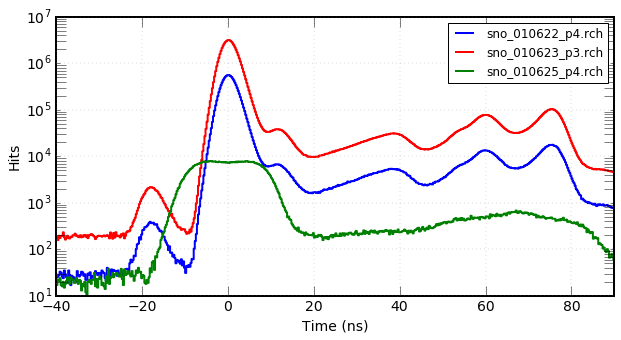

In [4]:
fig = plt.figure(figsize=(10,5))
jplot.unfilledBar(xaxis[0], binc[0], color = 'blue', label = file_list[0])
jplot.unfilledBar(xaxis[1], binc[1], color = 'red', label = file_list[1])
jplot.unfilledBar(xaxis[2], binc[2], color = 'green', label = file_list[2])

plt.yscale('log')
plt.xlim([-40, 90])
plt.ylim([10,1e7])
plt.ylabel('Hits')
plt.xlabel('Time (ns)')
plt.legend()

In [5]:
calx = xaxis[1]
caly = binc[1]

In [6]:
data = {}

In [7]:
# Reading fcn
def readFile(one_dirname, fname):
    if one_dirname in data.keys():
        print 'This directory is already inside:', one_dirname
        print '... redoing only missing info'
    else:
        data[one_dirname] = {}
        
    file_name = os.path.join(basedir, one_dirname, fname)

    if not data[one_dirname].has_key('nhits'):
        data[one_dirname]['nhits'] = lowlevel_stats.getMChits(file_name)
    if not data[one_dirname].has_key('hit_t'):
        data[one_dirname]['hit_t'] = lowlevel_stats.getHitTimes_MC(file_name)

    return

In [8]:
mycolors = ['b','r','g','m','c', 'y', '0.6']
def plotComparison(datasets = [], datakey = '', scale_factor = [], 
                   labels = [], figname = '', xaxis = np.arange(0, 100, 2),
                   xlabel = 'Nhits', ylabel = 'Entries'):

    if len(scale_factor) == 0:
        scale_factor = [1.]*len(datasets)
    if len(labels) == 0:
        labels = datasets
    # Reading each of the files one by one
    nbins = []
    myfig = plt.figure(figsize=(8,5))

    for i, one_set in enumerate(datasets):
        n, x = np.histogram(data[one_set][datakey], xaxis)
        nbins.append(n)
        print '\n',labels[i]

        print 'SUM ', data[one_set][datakey].sum()*scale_factor[i]
        print 'Mean ', data[one_set][datakey].mean()*scale_factor[i]
        print 'Std  ', data[one_set][datakey].std()*scale_factor[i]
        
        jplot.unfilledBar(xaxis, nbins[-1]*scale_factor[i], 
                              color = mycolors[i])
        jplot.errorMark(xaxis, nbins[-1]*scale_factor[i], 
                        error=np.sqrt(nbins[-1])*scale_factor[i], color=mycolors[i],
                        label =labels[i] + ' ' + \
                            '\nmean=' + "%.2f" % data[one_set][datakey].mean() +\
                            '\nstd=' + "%.2f" % data[one_set][datakey].std()) 
    

    
        
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    #plt.ylim([0,])
    plt.legend(loc=0,ncol=1)
    if len(figname) > 0:
        myfig.savefig(os.path.join(outdir, figname + '.png'), dpi=300)

In [9]:
mycolors = ['b','r','g','m','c', 'y', '0.6']

# Calibration scaling in number of photons
ti, tf = -5, 90
cal_range = [np.where(calx>ti)[0][0],np.where(calx>tf)[0][0]]
#print mc_range, cal_range
calwidth= calx[1]-calx[0]
calsum = caly[cal_range[0]:cal_range[1]].sum()*calwidth
#print calsum

def plotTOA(datasets = [], datakey = '', 
            labels = [], figname = '', xaxis = np.arange(-200, 500, 0.3),
            xlabel = 'time of arrival (ns)', ylabel = 'Entries'):
    
    if len(labels) == 0:
        labels = datasets
    nbins = []
    for i, one_set in enumerate(datasets):
        n, x = np.histogram(data[one_set][datakey], xaxis)
        nbins.append(n)
        
    # Find the peak and place it at t=0
    xaxis = xaxis - xaxis[nbins[0].argmax()]
    mc_range  = [np.where(xaxis>ti)[0][0],np.where(xaxis>tf)[0][0]]
    mcwidth = xaxis[1]-xaxis[0]

    
        
    myfig = plt.figure(figsize=(10,5))
    for i, one_n in enumerate(nbins):
        mcintegral = np.sum(one_n[mc_range[0]:mc_range[1]])*mcwidth
        factor = calsum/mcintegral

        print 'MCintegral', mcintegral
        print 'Factor', factor
        jplot.unfilledBar(xaxis, factor*one_n, 
                              color = mycolors[i], label=labels[i])
        #jplot.errorMark(xaxis, factor*one_n*scale_factor[i], 
        #                error=np.sqrt(one_n)*scale_factor[i], color=mycolors[i])
        print labels[i]

    
    
    
    #factor = nbins[0].sum()*mcwidth/caly.sum()/calwidth
    #print factor
    jplot.unfilledBar(calx, caly, color='k', label='Calibration')
    
    
    plt.xlabel('Hit time (ns, laserball @500nm)')
    plt.ylabel('Hits (rescaled to preserve integral)')        
    plt.xlim([-30, 90])
    plt.ylim([500, factor*nbins[0].max()*2])
    
    plt.yscale('log')
    #plt.ylim([0,])

    plt.legend(loc=0)
    if len(figname) > 0:
        myfig.savefig(os.path.join(outdir, figname + '.png'), dpi=300)

In [10]:
basedir = '/home/jp/projects/snoplus/rundir/greydisc_validation'
readFile('specular', 'laserball_oca_water2.root')

In [11]:
basedir = '/home/jp/projects/snoplus/rundir/greydisc_validation'
readFile('specular_gaussphi', 'laserball_oca_water2.root')

In [13]:
basedir = '/home/jp/projects/snoplus/rundir/greydisc_validation'
readFile('model_1', 'laserball_oca_water2.root')

In [15]:
basedir = '/home/jp/projects/snoplus/rundir/laserball_oca'
readFile('snoplus_heavywater_fulldaq', 'laserball_oca_water.root')

In [21]:
basedir = '/home/jp/projects/snoplus/rundir/laserball_oca'
readFile('snoplus_water_greydisc', 'laserball_oca_water.root')

In [18]:
basedir = '/home/jp/projects/snoplus/rundir/greydisc_validation'
readFile('model_1a', 'laserball_oca_water2.root')

In [25]:
basedir = '/home/jp/projects/snoplus/rundir/greydisc_validation'
readFile('model_2', 'laserball_oca_water2.root')

MCintegral 14419.2
Factor 1179.05917111
snoplus_heavywater_fulldaq
MCintegral 15713.1
Factor 1081.96918495
specular
MCintegral 11540.1
Factor 1473.21860296
snoplus_water_greydisc
MCintegral 14664.9
Factor 1159.30487081
model_1
MCintegral 14832.6
Factor 1146.19756482
model_2


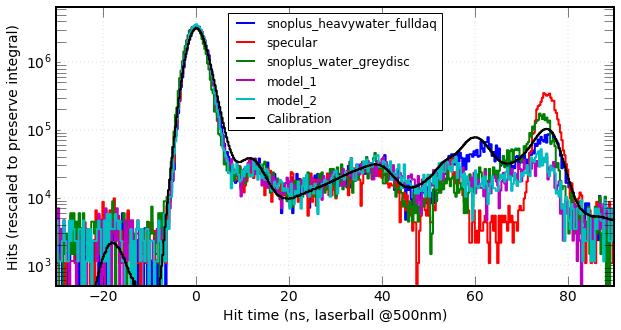

In [26]:
plotTOA(datasets = ['snoplus_heavywater_fulldaq',
                    'specular',
                    'snoplus_water_greydisc',
                    'model_1',
                    'model_2'],
              datakey='hit_t')

MCintegral 14419.2
Factor 1179.05917111
snoplus_heavywater_fulldaq
MCintegral 11540.1
Factor 1473.21860296
snoplus_water_greydisc
MCintegral 14682.0
Factor 1157.95463833
model_1a


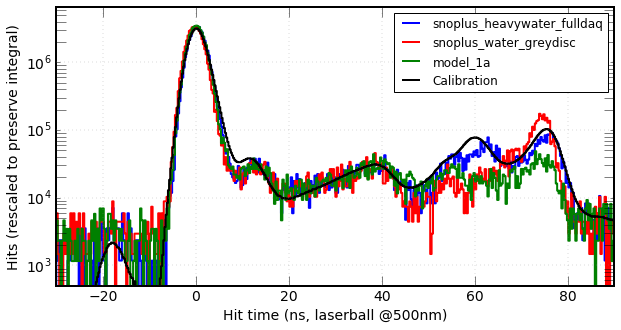

In [24]:
plotTOA(datasets = ['snoplus_heavywater_fulldaq', 
                    'snoplus_water_greydisc',
                    'model_1a'],
              datakey='hit_t')


snoplus_heavywater_fulldaq
SUM  51098.0
Mean  51.098
Std   6.81148999852

specular
SUM  58620.0
Mean  58.62
Std   7.54715840565


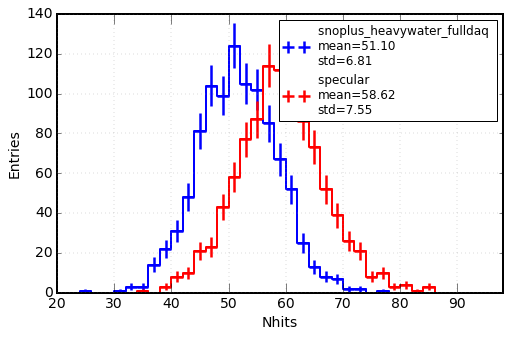

In [50]:
plotComparison(datasets = ['snoplus_heavywater_fulldaq','specular'],
              datakey='nhits',
              xaxis = np.arange(20,100,2),
              xlabel='Nhits')